In [1]:
# Pandas - Data manipulation and analysis library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Lasso, lars_path
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

from sklearn.impute import KNNImputer

In [2]:
data = pd.read_excel('XXHq_survey_ans.xlsx')

In [3]:
data.head()

,site,raceeth,q6orig,q7orig,record,orig_rec,q1,q2,q3,q4,...,q94,q95,q96,q97,q98,q99,BMIPCT,weight,stratum,psu
0,XX,7.0,504,121,1,NaN,5.0,2.0,2.0,1.0,...,2.0,5.0,1.0,1.0,2.0,1.0,46.882141,1.6659,213,57923
1,XX,8.0,503,119,2,NaN,4.0,2.0,2.0,2.0,...,2.0,6.0,1.0,1.0,2.0,1.0,62.232194,1.3851,213,57923
2,XX,8.0,506,95,3,NaN,4.0,1.0,2.0,2.0,...,2.0,1.0,1.0,3.0,2.0,1.0,0.590171,1.4958,213,57923
3,XX,5.0,510,152,4,NaN,4.0,2.0,2.0,2.0,...,2.0,1.0,1.0,3.0,1.0,1.0,69.786634,1.7114,213,57923
4,XX,6.0,510,130,5,NaN,5.0,2.0,2.0,1.0,...,2.0,2.0,1.0,3.0,2.0,2.0,16.739994,1.6659,213,57923


In [4]:
print(data.shape)
print (data.info())

(13677, 109)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13677 entries, 0 to 13676
Columns: 109 entries, site to psu
dtypes: float64(102), int64(3), object(4)
memory usage: 11.4+ MB
None


## Data Cleaning
The columns in the dataframe are cleaned and reorganized:
- Create target based on qn 46 labelled it as 0 and 1.
- Drop columns that have been reengineered
- Cells with missings values are imputed using KNN imputer 
- Filter out categorical columns and create dummy variables
- Merge numerical and categorica data back together


In [5]:
data1 = data.drop(columns=['q6orig','q7orig','site','q5','q4','orig_rec','weight','stratum','psu','record'])

In [6]:
data1

,raceeth,q1,q2,q3,q6,q7,q8,q9,q10,q11,...,q91,q92,q93,q94,q95,q96,q97,q98,q99,BMIPCT
0,7.0,5.0,2.0,2.0,1.63,54.89,4.0,1.0,2.0,2.0,...,1.0,2.0,6.0,2.0,5.0,1.0,1.0,2.0,1.0,46.882141
1,8.0,4.0,2.0,2.0,1.60,53.98,5.0,2.0,2.0,2.0,...,1.0,1.0,7.0,2.0,6.0,1.0,1.0,2.0,1.0,62.232194
2,8.0,4.0,1.0,2.0,1.68,43.09,4.0,1.0,2.0,2.0,...,1.0,1.0,5.0,2.0,1.0,1.0,3.0,2.0,1.0,0.590171
3,5.0,4.0,2.0,2.0,1.78,68.95,4.0,1.0,1.0,1.0,...,3.0,1.0,6.0,2.0,1.0,1.0,3.0,1.0,1.0,69.786634
4,6.0,5.0,2.0,2.0,1.78,58.97,4.0,1.0,1.0,1.0,...,1.0,3.0,6.0,2.0,2.0,1.0,3.0,2.0,2.0,16.739994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13672,5.0,4.0,1.0,1.0,1.60,56.25,5.0,1.0,1.0,1.0,...,NaN,NaN,6.0,NaN,NaN,NaN,4.0,NaN,NaN,69.885572
13673,3.0,6.0,2.0,2.0,NaN,NaN,5.0,1.0,2.0,2.0,...,NaN,NaN,2.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN
13674,5.0,5.0,2.0,3.0,1.83,54.43,5.0,1.0,2.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.758043
13675,7.0,5.0,2.0,3.0,1.65,56.70,4.0,1.0,2.0,4.0,...,NaN,NaN,6.0,NaN,NaN,NaN,2.0,NaN,NaN,49.312869


In [2]:
#rename
data1.columns = ['Raceeth','Age','Gender','Grade','Height','Weight','Seat_belt_use','Riding_with_a_drinking_driver','Drinking_and_driving','Texting_and_driving','Weapon_carrying','Weapon_carrying_at_school','Gun_carrying_past_12_mos','Safety_concerns_at_school','Threatened_at_school','Physical_fighting','Physical_fighting_at_school','Forced_sexual_intercourse','Sexual_violence','Sexual_dating_violence','Physical_dating_violence','Bullying_at_school','Electronic_bullying','Sad_or_hopeless','Considered_suicide','Made_a_suicide_plan','Attempted_suicide','Injurious_suicide_attempt','Ever_cigarette_use','Initiation_of_cigarette_smoking','Current_cigarette_use','Smoked_>_10_cigarettes','Electronic_vapor_product_use','Current_electronic_vapor_use','EVP_from_store','Current_smokeless_tobacco_use','Current_cigar_use','All_tobacco_product_cessation','Initiation_of_alcohol_use','Current_alcohol_use','Current_binge_drinking','Largest_number_of_drinks','Source_of_alcohol','Ever_marijuana_use','Initiation_of_marijuana_use','Current_marijuana_use','Ever_synthetic_marijuana_use','Ever_prescription_pain_medicine_use','Ever_cocaine_use','Ever_inhalant_use','Ever_heroin_use','Ever_methamphetamine_use','Ever_ecstasy_use','Ever_steroid_use','Illegal_injected_drug_use','Illegal_drugs_at_school','Ever_sexual_intercourse','Sex_before_13_years','Multiple_sex_partners','Current_sexual_activity','Alcohol/drugs_and_sex','Condom_use','Birth_control_pill_use','Sex_of_sexual_contacts','Sexual_identity','Perception_of_weight','Weight_loss','Fruit_juice_drinking','Fruit_eating','Green_salad_eating','Potato_eating','Carrot_eating','Other_vegetable_eating','No_soda_drinking','No_milk_drinking','Breakfast_eating','Physical_activity_>=_5_days','Television_watching','Computer_use','PE_attendance','Sports_team_participation','Concussion','HIV_testing','STD_testing','Oral_health_care','Asthma','Sleep','Grades_in_school','Current_prescription_pain_medicine_use','Ever_used_LSD','Sports_drinks','Plain_water','Food_allergies','Muscle_strengthening','Indoor_tanning','Sunscreen','Difficulty_concentrating','How_well_speak_English','BMI']


NameError: name 'data1' is not defined

In [8]:
#missing.to_csv('missing.csv')

In [9]:
# summarize the number of rows with missing values for each column
for i in range(data1.shape[1]):
    # count number of rows with missing values
    n_miss = data1.iloc[:, i].isnull().sum()
    perc = n_miss / data1.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 438 (3.2%)
> 1, Missing: 72 (0.5%)
> 2, Missing: 151 (1.1%)
> 3, Missing: 112 (0.8%)
> 4, Missing: 1537 (11.2%)
> 5, Missing: 1537 (11.2%)
> 6, Missing: 2528 (18.5%)
> 7, Missing: 860 (6.3%)
> 8, Missing: 1199 (8.8%)
> 9, Missing: 1567 (11.5%)
> 10, Missing: 3133 (22.9%)
> 11, Missing: 776 (5.7%)
> 12, Missing: 2818 (20.6%)
> 13, Missing: 76 (0.6%)
> 14, Missing: 132 (1.0%)
> 15, Missing: 2906 (21.2%)
> 16, Missing: 558 (4.1%)
> 17, Missing: 2438 (17.8%)
> 18, Missing: 3439 (25.1%)
> 19, Missing: 3324 (24.3%)
> 20, Missing: 408 (3.0%)
> 21, Missing: 230 (1.7%)
> 22, Missing: 192 (1.4%)
> 23, Missing: 256 (1.9%)
> 24, Missing: 240 (1.8%)
> 25, Missing: 255 (1.9%)
> 26, Missing: 3157 (23.1%)
> 27, Missing: 4928 (36.0%)
> 28, Missing: 3708 (27.1%)
> 29, Missing: 1375 (10.1%)
> 30, Missing: 1360 (9.9%)
> 31, Missing: 2783 (20.3%)
> 32, Missing: 472 (3.5%)
> 33, Missing: 910 (6.7%)
> 34, Missing: 1493 (10.9%)
> 35, Missing: 886 (6.5%)
> 36, Missing: 872 (6.4%)
> 37, Missing: 3

In [10]:
print(data1.shape)
data1.dtypes

(13677, 99)


Raceeth                     float64
Age                         float64
Gender                      float64
Grade                       float64
Height                      float64
                             ...   
Indoor_tanning              float64
Sunscreen                   float64
Difficulty_concentrating    float64
How_well_speak_English      float64
BMI                         float64
Length: 99, dtype: object

## Exploratory Data Analysis 

In [11]:
#we are interested in detecting if the youth have tried weed before using qn46 437/13677=0.032 missing data
data1 = data1.dropna(subset = ['Initiation_of_marijuana_use']) 

In [12]:
#create a target if 1 = 0 , anything >1 = 1
data1['Tried_weed'] = np.where(data1['Initiation_of_marijuana_use'] > 1, 1, 0) 

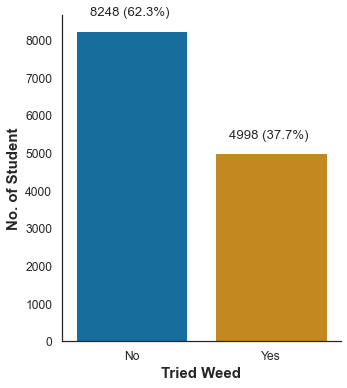

In [13]:
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[5,6])
ax = sns.countplot(data=data1,x='Tried_weed',palette='colorblind')
ax.set_xticklabels(['No','Yes'])
for p in ax.patches:
        ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(data1)*100).round(1))+'%)', (p.get_x()+0.1, p.get_height()+400))
plt.xlabel('Tried Weed',weight='bold',fontsize='15')   
plt.ylabel('No. of Student',weight='bold',fontsize='15')   
sns.despine()
plt.savefig('targetplot1.png',transparent=True, bbox_inches='tight')

In [14]:
data1

,Raceeth,Age,Gender,Grade,Height,Weight,Seat_belt_use,Riding_with_a_drinking_driver,Drinking_and_driving,Texting_and_driving,...,Sports_drinks,Plain_water,Food_allergies,Muscle_strengthening,Indoor_tanning,Sunscreen,Difficulty_concentrating,How_well_speak_English,BMI,Tried_weed
0,7.0,5.0,2.0,2.0,1.63,54.89,4.0,1.0,2.0,2.0,...,2.0,6.0,2.0,5.0,1.0,1.0,2.0,1.0,46.882141,0
1,8.0,4.0,2.0,2.0,1.60,53.98,5.0,2.0,2.0,2.0,...,1.0,7.0,2.0,6.0,1.0,1.0,2.0,1.0,62.232194,1
2,8.0,4.0,1.0,2.0,1.68,43.09,4.0,1.0,2.0,2.0,...,1.0,5.0,2.0,1.0,1.0,3.0,2.0,1.0,0.590171,0
3,5.0,4.0,2.0,2.0,1.78,68.95,4.0,1.0,1.0,1.0,...,1.0,6.0,2.0,1.0,1.0,3.0,1.0,1.0,69.786634,1
4,6.0,5.0,2.0,2.0,1.78,58.97,4.0,1.0,1.0,1.0,...,3.0,6.0,2.0,2.0,1.0,3.0,2.0,2.0,16.739994,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13672,5.0,4.0,1.0,1.0,1.60,56.25,5.0,1.0,1.0,1.0,...,NaN,6.0,NaN,NaN,NaN,4.0,NaN,NaN,69.885572,0
13673,3.0,6.0,2.0,2.0,NaN,NaN,5.0,1.0,2.0,2.0,...,NaN,2.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,1
13674,5.0,5.0,2.0,3.0,1.83,54.43,5.0,1.0,2.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.758043,0
13675,7.0,5.0,2.0,3.0,1.65,56.70,4.0,1.0,2.0,4.0,...,NaN,6.0,NaN,NaN,NaN,2.0,NaN,NaN,49.312869,1


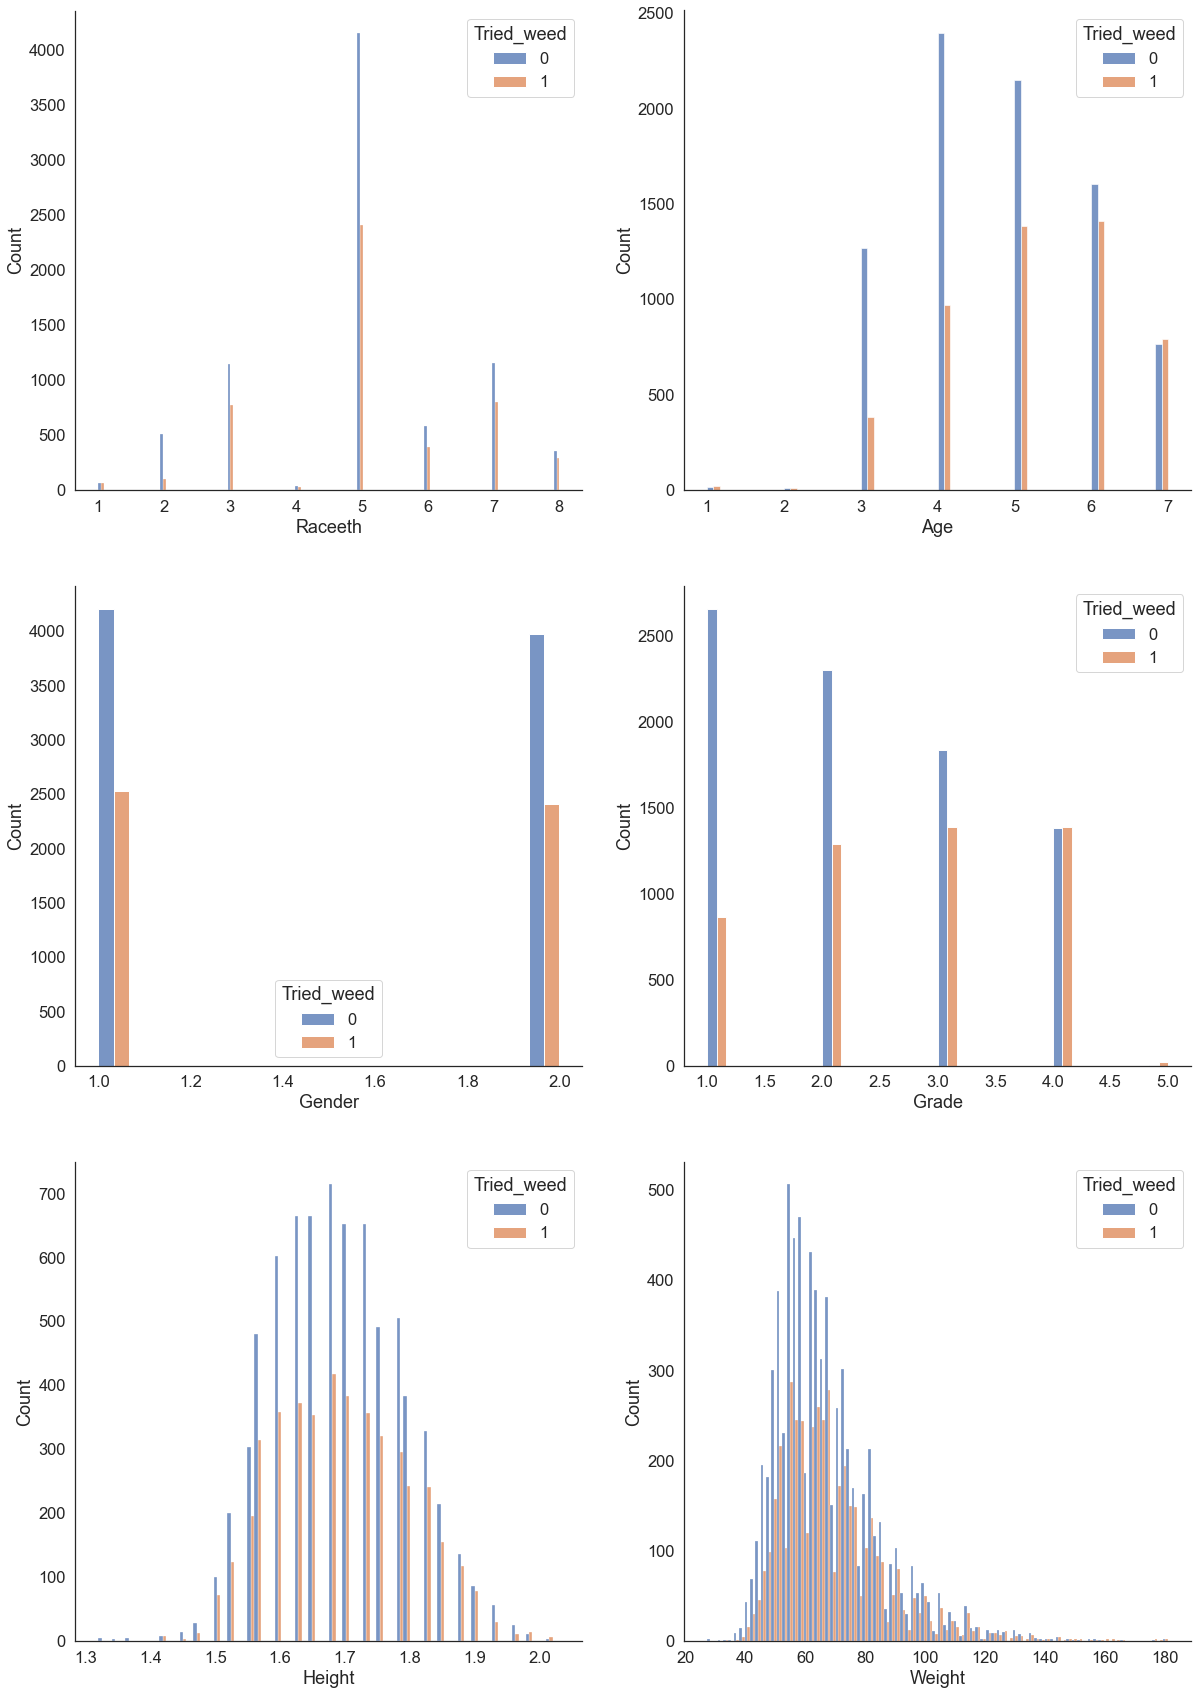

In [15]:
#display how target relate to demographics
sns.set(style='white',font_scale=1.5)
fig = plt.figure(figsize=[20,30])
for i in range(6):
    fig.add_subplot(3, 2, i+1)
    #sns.kdeplot(data=data1,x=data1.columns[i+2],hue='Tried_weed')
    sns.histplot(data=data1, x=data1.columns[i], hue='Tried_weed',multiple="dodge")
    sns.despine()
    plt.savefig('demograph.png',transparent=True, bbox_inches='tight')

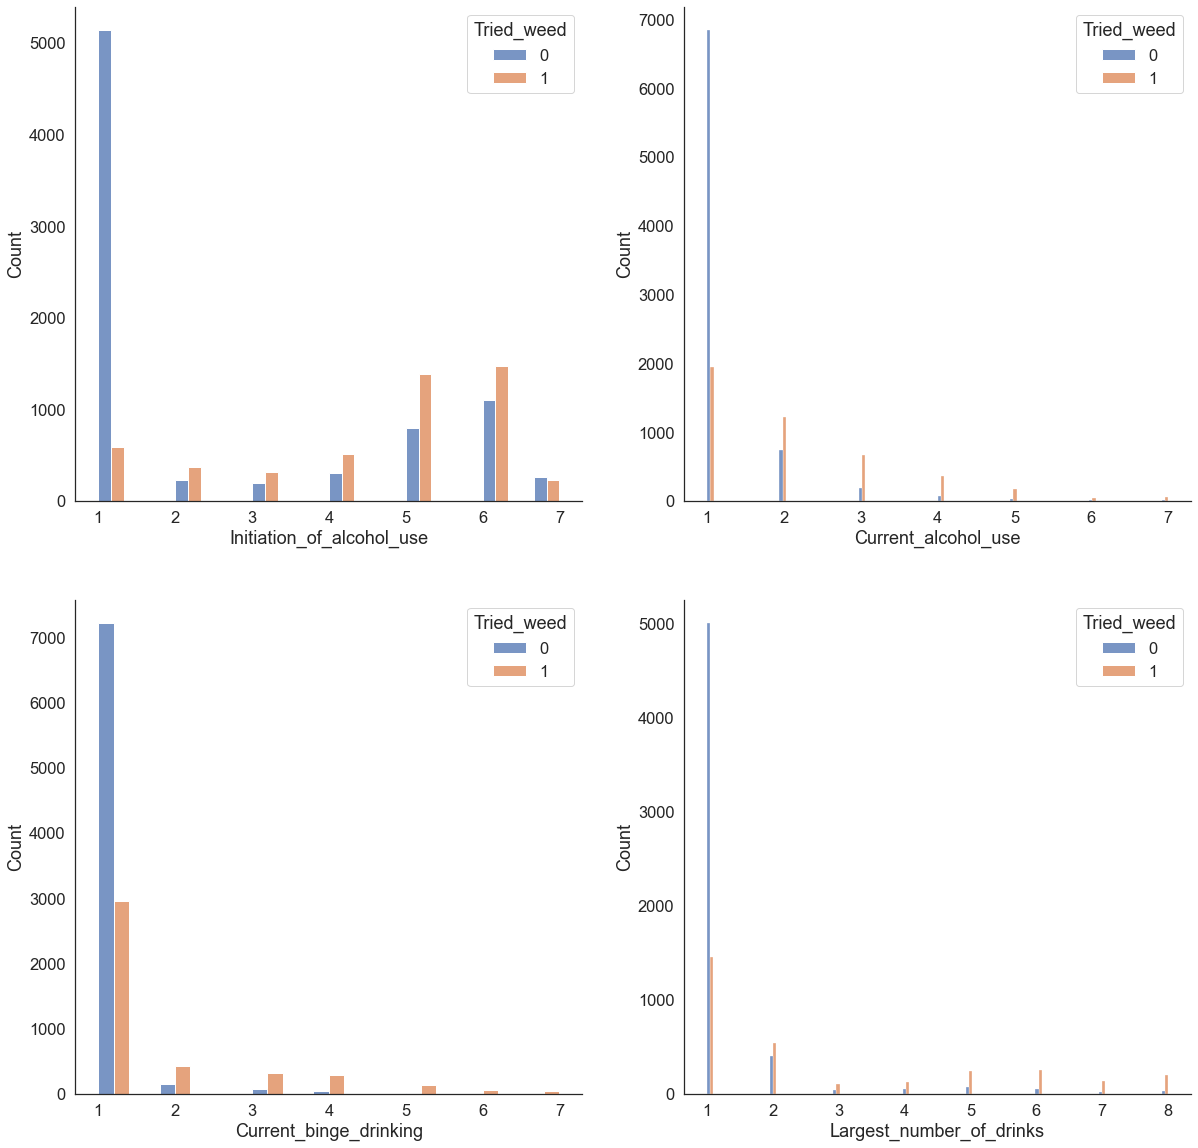

In [16]:
#display how target relate to alcohol usage
sns.set(style='white',font_scale=1.5)
fig = plt.figure(figsize=[20,20])
for i in range(4):
    fig.add_subplot(2, 2, i+1)
    sns.histplot(data=data1,
    x=data1.columns[i+38], hue='Tried_weed',multiple="dodge")
    sns.despine()
    plt.savefig('alcohol.png',transparent=True, bbox_inches='tight')
    

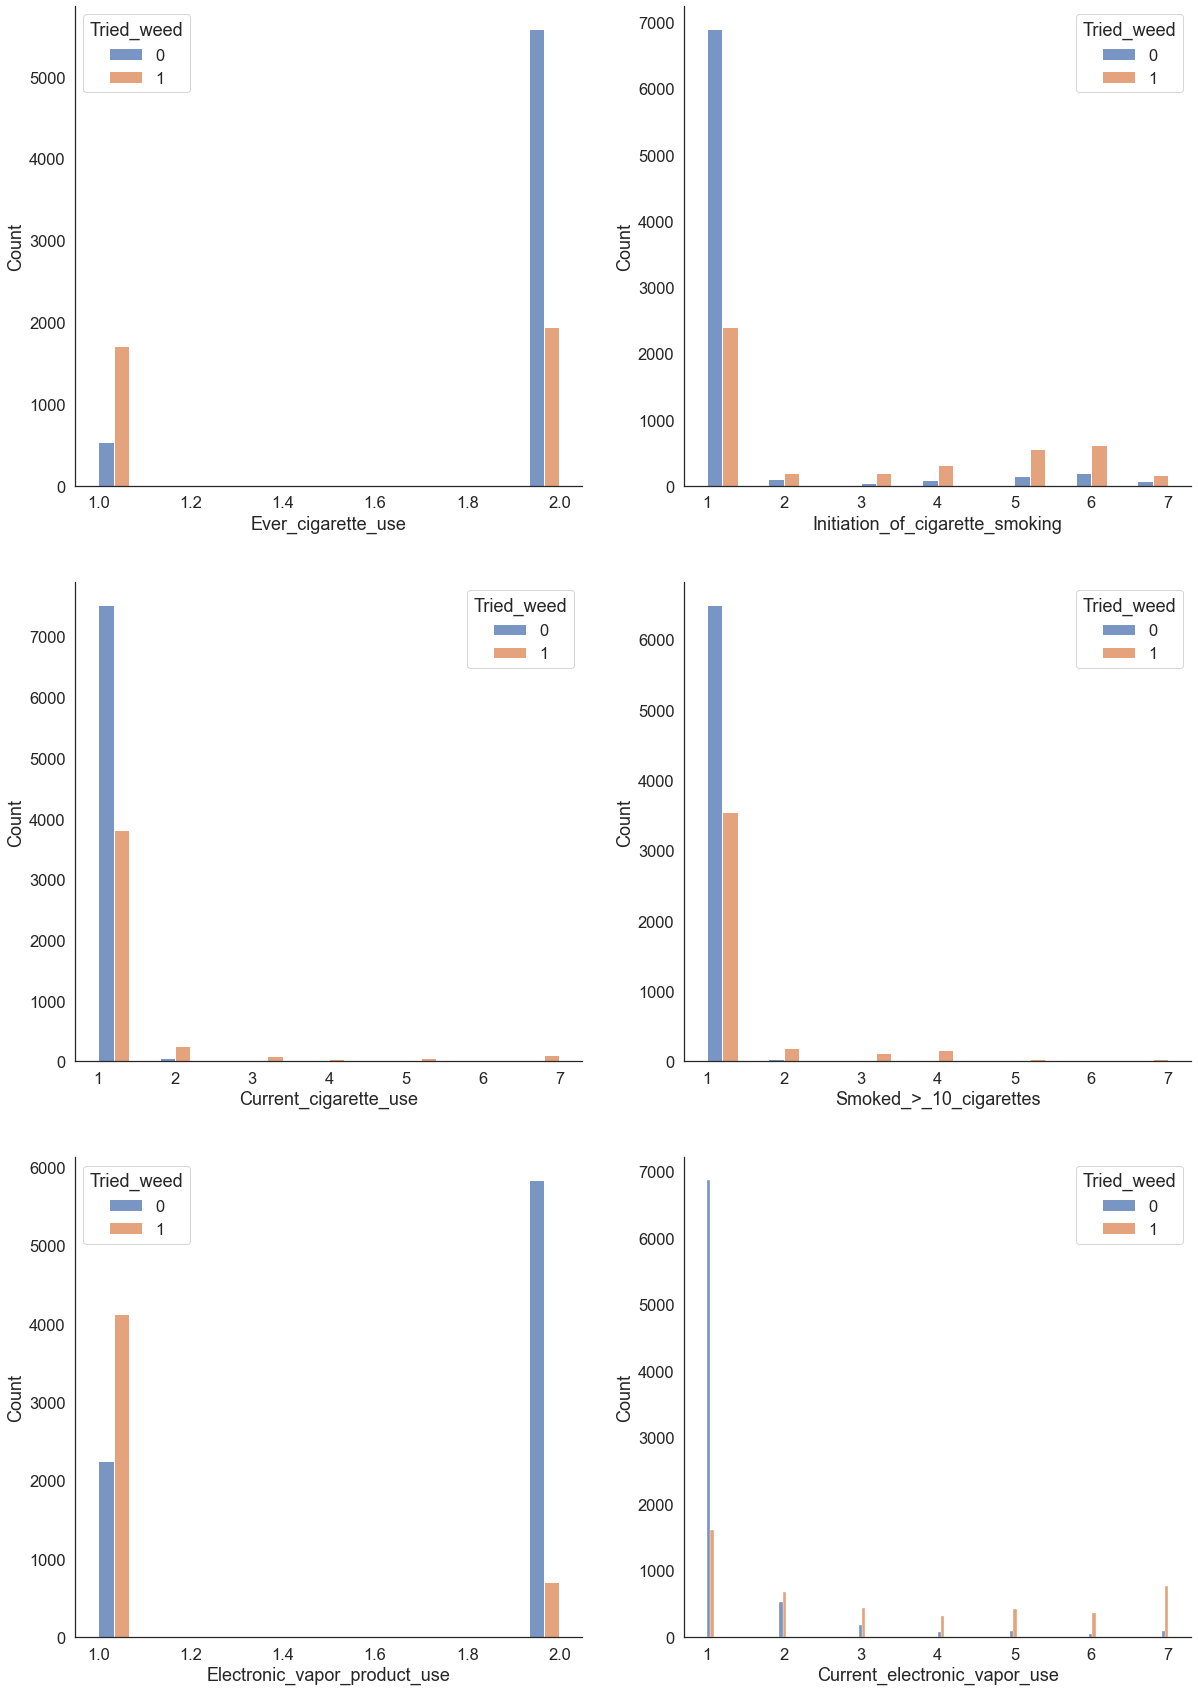

In [17]:
#display how target relate to Tobacco usage
sns.set(style='white',font_scale=1.5)
fig = plt.figure(figsize=[20,30])
for i in range(6):
    fig.add_subplot(3, 2, i+1)
    #sns.kdeplot(data=data1,x=data1.columns[i+30],hue='Tried_weed')
    sns.histplot(data=data1, x=data1.columns[i+28], hue='Tried_weed',multiple="dodge")
    sns.despine()
    plt.savefig('Tobacco.png',transparent=True, bbox_inches='tight')

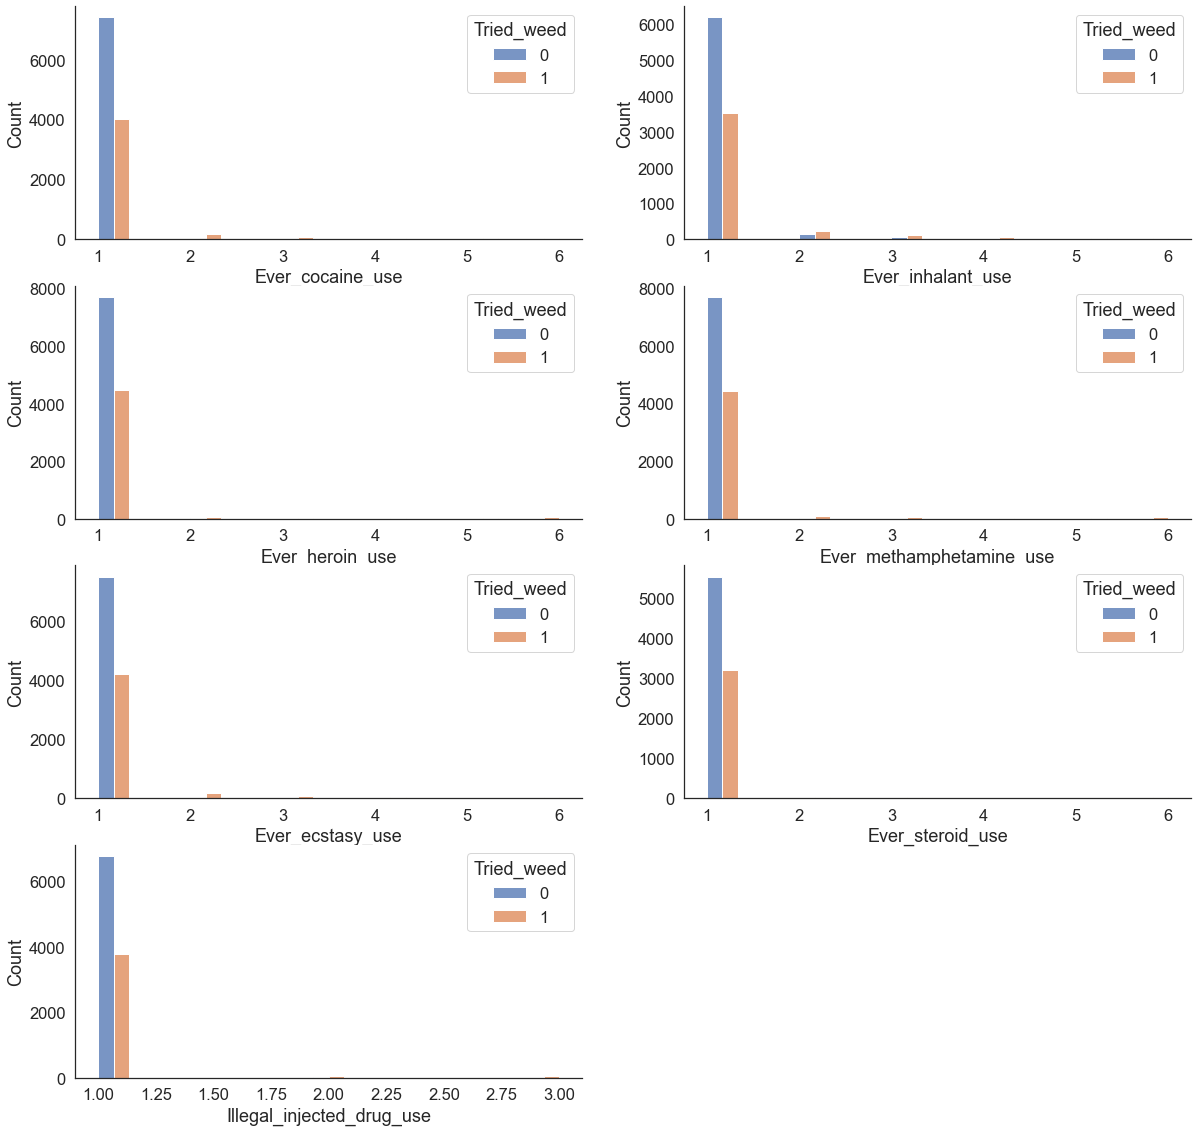

In [18]:
#display how target relate to Drugs usage
sns.set(style='white',font_scale=1.5)
fig = plt.figure(figsize=[20,30])
for i in range(7):
    fig.add_subplot(6, 2, i+1)
    #sns.kdeplot(data=data1,x=data1.columns[i+30],hue='Tried_weed')
    sns.histplot(data=data1, x=data1.columns[i+48], hue='Tried_weed',multiple="dodge")
    sns.despine()
    plt.savefig('Hard_Drugs.png',transparent=True, bbox_inches='tight')

## Find the best K for KNN imputer

data_m2 = data1.copy()

data_m2 = data_m2.dropna(subset = ["q47"])
print(data1.shape)
print(data_m2.shape)

In [19]:
data_m1 = data1.copy()

In [20]:
data_m1 = data_m1.drop(columns=['BMI','Height','Weight'])

In [21]:
data_m = data_m1.values

In [22]:
# split into input and output elements
ix = [i for i in range(data_m.shape[1]) if i != 96] #range of colm excluding 96 (coz 96 is y) we shl use our y as Qn47 372 missing
X_m, y_m = data_m[:, ix], data_m[:, 96]


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_m = sc.fit_transform(X_m)

In [130]:
# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in [40,45,50,55,60,65]]  #tried many values ranging from 3 to 80
for s in strategies:
# create the modeling pipeline 
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s),weights='distance')), ('m',LogisticRegression(random_state = 0) )])
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=8)
    scores = cross_val_score(pipeline, X_m, y_m, scoring='accuracy', cv=cv, n_jobs=-1)
    # store results
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))


>40 0.999 (0.001)
>45 0.998 (0.001)
>50 0.999 (0.001)
>55 0.999 (0.001)
>60 0.999 (0.001)
>65 0.999 (0.001)


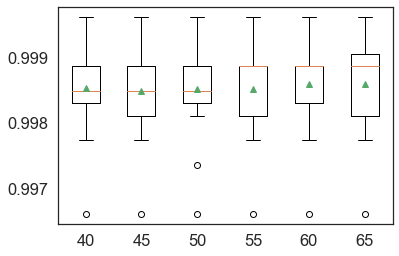

In [131]:
from matplotlib import pyplot
# plot model performance for comparison # we shall choose 48
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

In [25]:
#credits to https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/

In [26]:
#imputer = KNNImputer(n_neighbors=7) #weight = uniform #might wanna try a new no. after the whole modelling

In [27]:
#imp_data=imputer.fit_transform(data1)

## Impute missing values and Create Dummy 

In [28]:
data1 = data1.drop(columns=['Height','Weight','BMI']) #'BMI'

In [29]:
#df.to_csv('imp_data.csv')

In [89]:
imputer = KNNImputer(n_neighbors=40, weights='distance') #weight = distance so closer distance have heavier weight

In [90]:
imp_data1=imputer.fit_transform(data1)

In [91]:
imp_data1

array([[7.        , 5.        , 2.        , ..., 2.        , 1.        ,
        0.        ],
       [8.        , 4.        , 2.        , ..., 2.        , 1.        ,
        1.        ],
       [8.        , 4.        , 1.        , ..., 2.        , 1.        ,
        0.        ],
       ...,
       [5.        , 5.        , 2.        , ..., 1.        , 1.        ,
        0.        ],
       [7.        , 5.        , 2.        , ..., 1.62313254, 1.11485465,
        1.        ],
       [5.        , 6.        , 1.        , ..., 2.        , 1.        ,
        0.        ]])

In [92]:
df = pd.DataFrame(data=imp_data1 , columns=data1.columns)

In [93]:
df = df.reset_index()


In [94]:
df

,index,Raceeth,Age,Gender,Grade,Seat_belt_use,Riding_with_a_drinking_driver,Drinking_and_driving,Texting_and_driving,Weapon_carrying,...,Ever_used_LSD,Sports_drinks,Plain_water,Food_allergies,Muscle_strengthening,Indoor_tanning,Sunscreen,Difficulty_concentrating,How_well_speak_English,Tried_weed
0,0,7.0,5.0,2.0,2.0,4.0,1.0,2.0,2.0,1.000000,...,1.000000,2.000000,6.00000,2.000000,5.000000,1.000000,1.000000,2.000000,1.000000,0.0
1,1,8.0,4.0,2.0,2.0,5.0,2.0,2.0,2.0,1.000000,...,1.000000,1.000000,7.00000,2.000000,6.000000,1.000000,1.000000,2.000000,1.000000,1.0
2,2,8.0,4.0,1.0,2.0,4.0,1.0,2.0,2.0,1.000000,...,1.000000,1.000000,5.00000,2.000000,1.000000,1.000000,3.000000,2.000000,1.000000,0.0
3,3,5.0,4.0,2.0,2.0,4.0,1.0,1.0,1.0,1.000000,...,3.000000,1.000000,6.00000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.0
4,4,6.0,5.0,2.0,2.0,4.0,1.0,1.0,1.0,1.000000,...,1.000000,3.000000,6.00000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13241,13241,5.0,4.0,1.0,1.0,5.0,1.0,1.0,1.0,1.099633,...,1.000000,1.476310,6.00000,1.883664,2.140487,1.039067,4.000000,1.543356,1.232154,0.0
13242,13242,3.0,6.0,2.0,2.0,5.0,1.0,2.0,2.0,1.533636,...,1.060934,1.883023,2.00000,1.861632,3.530965,1.077011,3.000000,1.541401,1.180391,1.0
13243,13243,5.0,5.0,2.0,3.0,5.0,1.0,2.0,7.0,1.183743,...,1.000000,1.739074,5.28956,1.000000,4.313124,1.000000,1.000000,1.000000,1.000000,0.0
13244,13244,7.0,5.0,2.0,3.0,4.0,1.0,2.0,4.0,1.168135,...,1.018073,1.544022,6.00000,1.938333,3.577537,1.000000,2.000000,1.623133,1.114855,1.0


In [95]:
#df.to_csv('imp_data1.csv')

In [96]:
cat= df[['Raceeth','Gender','Bullying_at_school','Electronic_bullying','Sad_or_hopeless','Considered_suicide','Made_a_suicide_plan','Injurious_suicide_attempt','Ever_cigarette_use','Electronic_vapor_product_use','EVP_from_store','All_tobacco_product_cessation','Source_of_alcohol','Illegal_drugs_at_school','Ever_sexual_intercourse','Birth_control_pill_use','Sex_of_sexual_contacts','Sexual_identity','Weight_loss','HIV_testing','STD_testing','Oral_health_care','Asthma','Food_allergies','Difficulty_concentrating']]

In [97]:
cat=cat.round(0)

In [98]:
cat=cat.reset_index()
cat

,index,Raceeth,Gender,Bullying_at_school,Electronic_bullying,Sad_or_hopeless,Considered_suicide,Made_a_suicide_plan,Injurious_suicide_attempt,Ever_cigarette_use,...,Birth_control_pill_use,Sex_of_sexual_contacts,Sexual_identity,Weight_loss,HIV_testing,STD_testing,Oral_health_care,Asthma,Food_allergies,Difficulty_concentrating
0,0,7.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,...,1.0,1.0,1.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0
1,1,8.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,...,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0
2,2,8.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,...,1.0,1.0,1.0,4.0,3.0,2.0,1.0,2.0,2.0,2.0
3,3,5.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,...,1.0,1.0,1.0,3.0,2.0,2.0,1.0,3.0,2.0,1.0
4,4,6.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,...,1.0,1.0,1.0,4.0,2.0,2.0,1.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13241,13241,5.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,...,1.0,3.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0
13242,13242,3.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,...,4.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
13243,13243,5.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,...,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0
13244,13244,7.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,...,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0


In [99]:
cat=cat.astype('category')

In [100]:
cat['index']=cat['index'].astype('int')

In [101]:
cat.dtypes

index                               int32
Raceeth                          category
Gender                           category
Bullying_at_school               category
Electronic_bullying              category
Sad_or_hopeless                  category
Considered_suicide               category
Made_a_suicide_plan              category
Injurious_suicide_attempt        category
Ever_cigarette_use               category
Electronic_vapor_product_use     category
EVP_from_store                   category
All_tobacco_product_cessation    category
Source_of_alcohol                category
Illegal_drugs_at_school          category
Ever_sexual_intercourse          category
Birth_control_pill_use           category
Sex_of_sexual_contacts           category
Sexual_identity                  category
Weight_loss                      category
HIV_testing                      category
STD_testing                      category
Oral_health_care                 category
Asthma                           c

In [102]:
cat_dum =pd.get_dummies(cat, drop_first=True)

In [103]:
cat_dum

,index,Raceeth_2.0,Raceeth_3.0,Raceeth_4.0,Raceeth_5.0,Raceeth_6.0,Raceeth_7.0,Raceeth_8.0,Gender_2.0,Bullying_at_school_2.0,...,STD_testing_3.0,Oral_health_care_2.0,Oral_health_care_3.0,Oral_health_care_4.0,Oral_health_care_5.0,Asthma_2.0,Asthma_3.0,Food_allergies_2.0,Food_allergies_3.0,Difficulty_concentrating_2.0
0,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,1,0,1,0,1
1,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,1,0,1
2,2,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,1
3,3,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,1,1,0,0
4,4,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13241,13241,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
13242,13242,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,1
13243,13243,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
13244,13244,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,1,0,1,0,1


In [117]:
df_num= df.drop(columns=['Raceeth','Gender','Bullying_at_school','Electronic_bullying','Sad_or_hopeless','Considered_suicide','Made_a_suicide_plan','Injurious_suicide_attempt','Ever_cigarette_use','Electronic_vapor_product_use','EVP_from_store','All_tobacco_product_cessation','Source_of_alcohol','Illegal_drugs_at_school','Ever_sexual_intercourse','Birth_control_pill_use','Sex_of_sexual_contacts','Sexual_identity','Weight_loss','HIV_testing','STD_testing','Oral_health_care','Asthma','Food_allergies','Difficulty_concentrating'])

In [118]:
df_num=df_num.round(1)

In [119]:
df_num

,index,Age,Grade,Seat_belt_use,Riding_with_a_drinking_driver,Drinking_and_driving,Texting_and_driving,Weapon_carrying,Weapon_carrying_at_school,Gun_carrying_past_12_mos,...,Grades_in_school,Current_prescription_pain_medicine_use,Ever_used_LSD,Sports_drinks,Plain_water,Muscle_strengthening,Indoor_tanning,Sunscreen,How_well_speak_English,Tried_weed
0,0,5.0,2.0,4.0,1.0,2.0,2.0,1.0,1.0,1.0,...,2.0,1.0,1.0,2.0,6.0,5.0,1.0,1.0,1.0,0.0
1,1,4.0,2.0,5.0,2.0,2.0,2.0,1.0,1.0,1.0,...,2.0,1.0,1.0,1.0,7.0,6.0,1.0,1.0,1.0,1.0
2,2,4.0,2.0,4.0,1.0,2.0,2.0,1.0,1.0,1.0,...,2.0,1.0,1.0,1.0,5.0,1.0,1.0,3.0,1.0,0.0
3,3,4.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,...,3.0,1.0,3.0,1.0,6.0,1.0,1.0,3.0,1.0,1.0
4,4,5.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,3.0,6.0,2.0,1.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13241,13241,4.0,1.0,5.0,1.0,1.0,1.0,1.1,1.0,1.0,...,7.0,1.0,1.0,1.5,6.0,2.1,1.0,4.0,1.2,0.0
13242,13242,6.0,2.0,5.0,1.0,2.0,2.0,1.5,1.2,1.3,...,3.0,1.2,1.1,1.9,2.0,3.5,1.1,3.0,1.2,1.0
13243,13243,5.0,3.0,5.0,1.0,2.0,7.0,1.2,1.1,1.0,...,2.0,1.0,1.0,1.7,5.3,4.3,1.0,1.0,1.0,0.0
13244,13244,5.0,3.0,4.0,1.0,2.0,4.0,1.2,1.0,1.0,...,2.0,1.1,1.0,1.5,6.0,3.6,1.0,2.0,1.1,1.0


In [106]:
#df_num =df_num.rename(columns = {'record':'index'})


In [120]:
clean_data=pd.merge(cat_dum, df_num, how='right', on='index')
clean_data

,index,Raceeth_2.0,Raceeth_3.0,Raceeth_4.0,Raceeth_5.0,Raceeth_6.0,Raceeth_7.0,Raceeth_8.0,Gender_2.0,Bullying_at_school_2.0,...,Grades_in_school,Current_prescription_pain_medicine_use,Ever_used_LSD,Sports_drinks,Plain_water,Muscle_strengthening,Indoor_tanning,Sunscreen,How_well_speak_English,Tried_weed
0,0,0,0,0,0,0,1,0,1,1,...,2.0,1.0,1.0,2.0,6.0,5.0,1.0,1.0,1.0,0.0
1,1,0,0,0,0,0,0,1,1,0,...,2.0,1.0,1.0,1.0,7.0,6.0,1.0,1.0,1.0,1.0
2,2,0,0,0,0,0,0,1,0,1,...,2.0,1.0,1.0,1.0,5.0,1.0,1.0,3.0,1.0,0.0
3,3,0,0,0,1,0,0,0,1,1,...,3.0,1.0,3.0,1.0,6.0,1.0,1.0,3.0,1.0,1.0
4,4,0,0,0,0,1,0,0,1,1,...,1.0,1.0,1.0,3.0,6.0,2.0,1.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13241,13241,0,0,0,1,0,0,0,0,1,...,7.0,1.0,1.0,1.5,6.0,2.1,1.0,4.0,1.2,0.0
13242,13242,0,1,0,0,0,0,0,1,0,...,3.0,1.2,1.1,1.9,2.0,3.5,1.1,3.0,1.2,1.0
13243,13243,0,0,0,1,0,0,0,1,1,...,2.0,1.0,1.0,1.7,5.3,4.3,1.0,1.0,1.0,0.0
13244,13244,0,0,0,0,0,1,0,1,1,...,2.0,1.1,1.0,1.5,6.0,3.6,1.0,2.0,1.1,1.0


In [121]:
#clean_data.to_csv('clean_data.csv')

In [122]:
#drop info leakage features - related to drugs
clean_drop =clean_data.drop(columns=['index','Ever_marijuana_use','Initiation_of_marijuana_use','Current_marijuana_use','Ever_synthetic_marijuana_use','Ever_prescription_pain_medicine_use','Ever_cocaine_use','Ever_inhalant_use','Ever_heroin_use','Ever_methamphetamine_use','Ever_ecstasy_use','Current_prescription_pain_medicine_use','Ever_used_LSD'])

In [123]:
clean_drop.describe()

,Raceeth_2.0,Raceeth_3.0,Raceeth_4.0,Raceeth_5.0,Raceeth_6.0,Raceeth_7.0,Raceeth_8.0,Gender_2.0,Bullying_at_school_2.0,Electronic_bullying_2.0,...,Concussion,Sleep,Grades_in_school,Sports_drinks,Plain_water,Muscle_strengthening,Indoor_tanning,Sunscreen,How_well_speak_English,Tried_weed
count,13246.000000,13246.000000,13246.000000,13246.000000,13246.000000,13246.000000,13246.000000,13246.000000,13246.000000,13246.000000,...,13246.000000,13246.000000,13246.000000,13246.000000,13246.00000,13246.000000,13246.000000,13246.000000,13246.000000,13246.000000
mean,0.045901,0.145176,0.012834,0.515703,0.074362,0.147667,0.048618,0.488147,0.802582,0.843877,...,1.237400,3.449857,2.064903,1.880507,5.15188,3.615273,1.096557,2.246520,1.191635,0.377321
std,0.209278,0.352291,0.112562,0.499772,0.262369,0.354783,0.215077,0.499878,0.398066,0.362985,...,0.651843,1.358012,1.302119,1.124967,1.69412,2.078587,0.469729,0.957644,0.385611,0.484735
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,4.00000,2.000000,1.000000,1.800000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,3.700000,2.000000,1.700000,5.30000,3.300000,1.000000,2.100000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.100000,4.000000,2.200000,2.000000,7.00000,5.000000,1.000000,3.000000,1.200000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,7.000000,7.000000,7.000000,7.00000,8.000000,6.000000,5.000000,4.000000,1.000000


In [124]:
corr_matrix = clean_drop.corr()
corr_matrix

,Raceeth_2.0,Raceeth_3.0,Raceeth_4.0,Raceeth_5.0,Raceeth_6.0,Raceeth_7.0,Raceeth_8.0,Gender_2.0,Bullying_at_school_2.0,Electronic_bullying_2.0,...,Concussion,Sleep,Grades_in_school,Sports_drinks,Plain_water,Muscle_strengthening,Indoor_tanning,Sunscreen,How_well_speak_English,Tried_weed
Raceeth_2.0,1.000000,-0.090390,-0.025009,-0.226337,-0.062168,-0.091296,-0.049583,0.008088,0.048967,0.032721,...,-0.023322,-0.021947,-0.081251,-0.084453,0.040516,-0.025945,-0.027885,0.015075,0.063886,-0.098548
Raceeth_3.0,-0.090390,1.000000,-0.046989,-0.425258,-0.116806,-0.171532,-0.093161,0.003127,0.062794,0.075115,...,0.028860,-0.047229,0.063398,0.064654,-0.131344,-0.035939,-0.032567,-0.163828,-0.006511,0.019635
Raceeth_4.0,-0.025009,-0.046989,1.000000,-0.117661,-0.032318,-0.047460,-0.025776,0.018805,0.006000,-0.006392,...,0.020211,0.000308,0.011985,-0.002734,-0.026574,-0.000547,-0.008589,-0.030894,0.011171,-0.032026
Raceeth_5.0,-0.226337,-0.425258,-0.117661,1.000000,-0.292482,-0.429518,-0.233274,0.004674,-0.102633,-0.094693,...,-0.030008,0.056403,-0.108622,-0.044952,0.068396,0.039884,0.061079,0.216485,-0.141608,-0.009188
Raceeth_6.0,-0.062168,-0.116806,-0.032318,-0.292482,1.000000,-0.117976,-0.064073,-0.010837,0.063223,0.059284,...,-0.016616,0.013941,0.075353,0.006037,0.009512,-0.009254,-0.034863,-0.059173,0.095326,0.010293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Muscle_strengthening,-0.025945,-0.035939,-0.000547,0.039884,-0.009254,0.000545,-0.004819,0.190403,0.016282,0.019621,...,0.117427,0.116638,-0.067871,0.227808,0.233548,1.000000,0.031166,0.024974,-0.041155,0.016678
Indoor_tanning,-0.027885,-0.032567,-0.008589,0.061079,-0.034863,-0.007007,-0.010226,-0.035029,-0.082736,-0.085027,...,0.158254,-0.005689,0.073317,0.102557,-0.008249,0.031166,1.000000,0.022452,0.126618,0.131045
Sunscreen,0.015075,-0.163828,-0.030894,0.216485,-0.059173,-0.078286,-0.027001,-0.161486,-0.019717,-0.017983,...,-0.023318,0.119305,-0.165340,-0.094153,0.162633,0.024974,0.022452,1.000000,-0.093573,-0.118244
How_well_speak_English,0.063886,-0.006511,0.011171,-0.141608,0.095326,0.102350,-0.021860,0.063252,-0.010513,-0.003937,...,0.118341,-0.065731,0.193749,0.065411,-0.103044,-0.041155,0.126618,-0.093573,1.000000,-0.010984


In [125]:
s = corr_matrix.unstack()
so = s.sort_values(kind="quicksort")
print (so)

Ever_sexual_intercourse_2.0  Alcohol/drugs_and_sex         -0.942407
Alcohol/drugs_and_sex        Ever_sexual_intercourse_2.0   -0.942407
Sex_before_13_years          Ever_sexual_intercourse_2.0   -0.915639
Ever_sexual_intercourse_2.0  Sex_before_13_years           -0.915639
                             Condom_use                    -0.900541
                                                              ...   
Current_cigar_use            Current_cigar_use              1.000000
Initiation_of_alcohol_use    Initiation_of_alcohol_use      1.000000
Current_alcohol_use          Current_alcohol_use            1.000000
Largest_number_of_drinks     Largest_number_of_drinks       1.000000
Tried_weed                   Tried_weed                     1.000000
Length: 15376, dtype: float64


In [126]:
#so.to_csv('so46.csv') 
#too many rows export to excel to check for correlation between vulnerable and other features and multicollinearity

In [127]:
#drop multicollinear features
clean_drop =clean_drop.drop(columns=['Age','Alcohol/drugs_and_sex','Ever_sexual_intercourse_2.0','Ever_cigarette_use_2.0']) 

In [128]:
corr_matrix = clean_drop.corr()
s = corr_matrix.unstack()
so = s.sort_values(kind="quicksort")
so.to_csv('so_dropped.csv')

In [129]:
clean_drop.to_csv('clean_drop1.csv',index=False)

## simple train test split on all data and try diff models

In [58]:
X = clean_drop.iloc[:, :-1].values
y = clean_drop.iloc[:, -1].values

In [59]:
X = clean_drop.iloc[:, :-1]
y = clean_drop.iloc[:, -1]

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [62]:
X_train

array([[-0.22508004, -0.41491372, -0.10134858, ..., -0.20852285,
         0.78782974, -0.48909318],
       [-0.22508004, -0.41491372, -0.10134858, ..., -0.20852285,
        -1.29957784, -0.48909318],
       [-0.22508004, -0.41491372, -0.10134858, ..., -0.20852285,
        -1.29957784,  2.08290298],
       ...,
       [-0.22508004, -0.41491372, -0.10134858, ..., -0.11113889,
        -0.39530829,  0.01628744],
       [ 4.4428639 , -0.41491372, -0.10134858, ..., -0.08190991,
         0.28225308,  0.21352338],
       [-0.22508004, -0.41491372, -0.10134858, ..., -0.20852285,
        -1.29957784, -0.48909318]])

In [63]:
lasso_model = Lasso(alpha = 0.05)    
selected_columns = list(X.columns)
lasso_model.fit(X, y)
list(zip(selected_columns, lasso_model.coef_))

[('Raceeth_2.0', -0.0),
 ('Raceeth_3.0', 0.0),
 ('Raceeth_4.0', -0.0),
 ('Raceeth_5.0', -0.0),
 ('Raceeth_6.0', 0.0),
 ('Raceeth_7.0', 0.0),
 ('Raceeth_8.0', 0.0),
 ('Gender_2.0', -0.0),
 ('Bullying_at_school_2.0', 0.0),
 ('Electronic_bullying_2.0', -0.0),
 ('Sad_or_hopeless_2.0', -0.0),
 ('Considered_suicide_2.0', -0.0),
 ('Made_a_suicide_plan_2.0', -0.0),
 ('Injurious_suicide_attempt_2.0', 0.0),
 ('Injurious_suicide_attempt_3.0', 0.0),
 ('Electronic_vapor_product_use_2.0', -0.0),
 ('EVP_from_store_2.0', 0.0),
 ('EVP_from_store_3.0', 0.0),
 ('EVP_from_store_4.0', 0.0),
 ('EVP_from_store_5.0', 0.0),
 ('EVP_from_store_6.0', 0.0),
 ('EVP_from_store_7.0', 0.0),
 ('EVP_from_store_8.0', 0.0),
 ('All_tobacco_product_cessation_2.0', 0.0),
 ('All_tobacco_product_cessation_3.0', 0.0),
 ('Source_of_alcohol_2.0', -0.0),
 ('Source_of_alcohol_3.0', 0.0),
 ('Source_of_alcohol_4.0', 0.0),
 ('Source_of_alcohol_5.0', 0.0),
 ('Source_of_alcohol_6.0', 0.0),
 ('Source_of_alcohol_7.0', 0.0),
 ('Source_of_a

In [64]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1797  240]
 [ 286  989]]


0.841183574879227

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      2037
         1.0       0.80      0.78      0.79      1275

    accuracy                           0.84      3312
   macro avg       0.83      0.83      0.83      3312
weighted avg       0.84      0.84      0.84      3312



In [67]:
#K nearest
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1879  158]
 [ 486  789]]


0.8055555555555556

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85      2037
         1.0       0.83      0.62      0.71      1275

    accuracy                           0.81      3312
   macro avg       0.81      0.77      0.78      3312
weighted avg       0.81      0.81      0.80      3312



In [70]:
#SVC
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1808  229]
 [ 286  989]]


0.8445048309178744

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88      2037
         1.0       0.81      0.78      0.79      1275

    accuracy                           0.84      3312
   macro avg       0.84      0.83      0.83      3312
weighted avg       0.84      0.84      0.84      3312



In [73]:
#kernel SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1781  256]
 [ 263 1012]]


0.8432971014492754

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      2037
         1.0       0.80      0.79      0.80      1275

    accuracy                           0.84      3312
   macro avg       0.83      0.83      0.83      3312
weighted avg       0.84      0.84      0.84      3312



In [76]:
#Naive_bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1748  289]
 [ 348  927]]


0.8076690821256038

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.86      0.85      2037
         1.0       0.76      0.73      0.74      1275

    accuracy                           0.81      3312
   macro avg       0.80      0.79      0.80      3312
weighted avg       0.81      0.81      0.81      3312



In [79]:
#DT
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1716  321]
 [ 353  922]]


0.7964975845410628

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84      2037
         1.0       0.74      0.72      0.73      1275

    accuracy                           0.80      3312
   macro avg       0.79      0.78      0.78      3312
weighted avg       0.80      0.80      0.80      3312



In [82]:
#RF
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1815  222]
 [ 335  940]]


0.8318236714975845

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      2037
         1.0       0.81      0.74      0.77      1275

    accuracy                           0.83      3312
   macro avg       0.83      0.81      0.82      3312
weighted avg       0.83      0.83      0.83      3312



In [85]:
classifier.feature_importances_


array([0.00100415, 0.00427924, 0.00017257, 0.00459569, 0.001615  ,
       0.00266766, 0.00137537, 0.00287393, 0.00303952, 0.00273722,
       0.00456577, 0.00305976, 0.00254236, 0.00038137, 0.00125687,
       0.07448271, 0.00273568, 0.00099524, 0.00679838, 0.00168167,
       0.00152778, 0.00022111, 0.00094891, 0.00546932, 0.00146124,
       0.00236932, 0.0028334 , 0.00112358, 0.00057937, 0.00132733,
       0.0004383 , 0.00081518, 0.00375613, 0.00204746, 0.00563548,
       0.00291332, 0.00061688, 0.00033499, 0.00077884, 0.00056549,
       0.00514496, 0.00345718, 0.00109504, 0.00123117, 0.00215537,
       0.00059894, 0.00265933, 0.00273247, 0.00217295, 0.00261767,
       0.00139769, 0.00280339, 0.00144193, 0.00232725, 0.00159654,
       0.00061071, 0.00144214, 0.00355009, 0.00112633, 0.00228881,
       0.00098153, 0.0052714 , 0.00913351, 0.0108134 , 0.0049239 ,
       0.00602162, 0.01904099, 0.00719848, 0.00225265, 0.00452714,
       0.00201288, 0.00291956, 0.00938633, 0.0036015 , 0.00431

In [86]:
df_impt = pd.DataFrame({'features':X.columns,'importance':classifier.feature_importances_})
df_impt = df_impt.sort_values(by='importance',ascending=False)
df_impt

,features,importance
82,Current_electronic_vapor_use,0.085176
15,Electronic_vapor_product_use_2.0,0.074483
88,Largest_number_of_drinks,0.059778
85,Initiation_of_alcohol_use,0.045254
79,Initiation_of_cigarette_smoking,0.042235
...,...,...
30,Source_of_alcohol_7.0,0.000438
13,Injurious_suicide_attempt_2.0,0.000381
37,Birth_control_pill_use_6.0,0.000335
21,EVP_from_store_7.0,0.000221


In [87]:
df_impt.head(10) #the top 10 features are the same as the features selected from correlation coefficient

,features,importance
82,Current_electronic_vapor_use,0.085176
15,Electronic_vapor_product_use_2.0,0.074483
88,Largest_number_of_drinks,0.059778
85,Initiation_of_alcohol_use,0.045254
79,Initiation_of_cigarette_smoking,0.042235
86,Current_alcohol_use,0.030267
92,Multiple_sex_partners,0.029312
87,Current_binge_drinking,0.023115
94,Condom_use,0.020140
93,Current_sexual_activity,0.019085
